In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("data/train_loan.csv")
test_data = pd.read_csv("data/test_loan.csv")


In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train_data.shape, test_data.shape

((614, 13), (367, 12))

In [6]:
train_data.info(), test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 no

(None, None)

In [7]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [9]:
combined_df = train_data.append(test_data)

In [10]:
combined_df.head(10)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No
5,5417,4196.0,1.0,2,Graduate,Male,267.0,360.0,LP001011,Y,Yes,Urban,Yes
6,2333,1516.0,1.0,0,Not Graduate,Male,95.0,360.0,LP001013,Y,Yes,Urban,No
7,3036,2504.0,0.0,3+,Graduate,Male,158.0,360.0,LP001014,N,Yes,Semiurban,No
8,4006,1526.0,1.0,2,Graduate,Male,168.0,360.0,LP001018,Y,Yes,Urban,No
9,12841,10968.0,1.0,1,Graduate,Male,349.0,360.0,LP001020,N,Yes,Semiurban,No


In [11]:
combined_df.shape

(981, 13)

In [12]:
combined_df.reset_index(inplace=True)
combined_df.drop(['index', 'Loan_ID','Loan_Status'], inplace=True, axis=1)

In [13]:
combined_df.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,No,Urban,No


In [14]:
combined_df.shape

(981, 11)

In [15]:
combined_df.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


#### Analysis of Target Varaible:

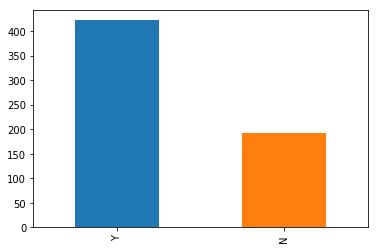

In [16]:
train_data['Loan_Status'].value_counts().plot.bar()


In [17]:
combined_df.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
Credit_History       79
Dependents           25
Education             0
Gender               24
LoanAmount           27
Loan_Amount_Term     20
Married               3
Property_Area         0
Self_Employed        55
dtype: int64

#### Analysis of Categorical Features:

Text(0.5, 1.0, 'Credit_History')

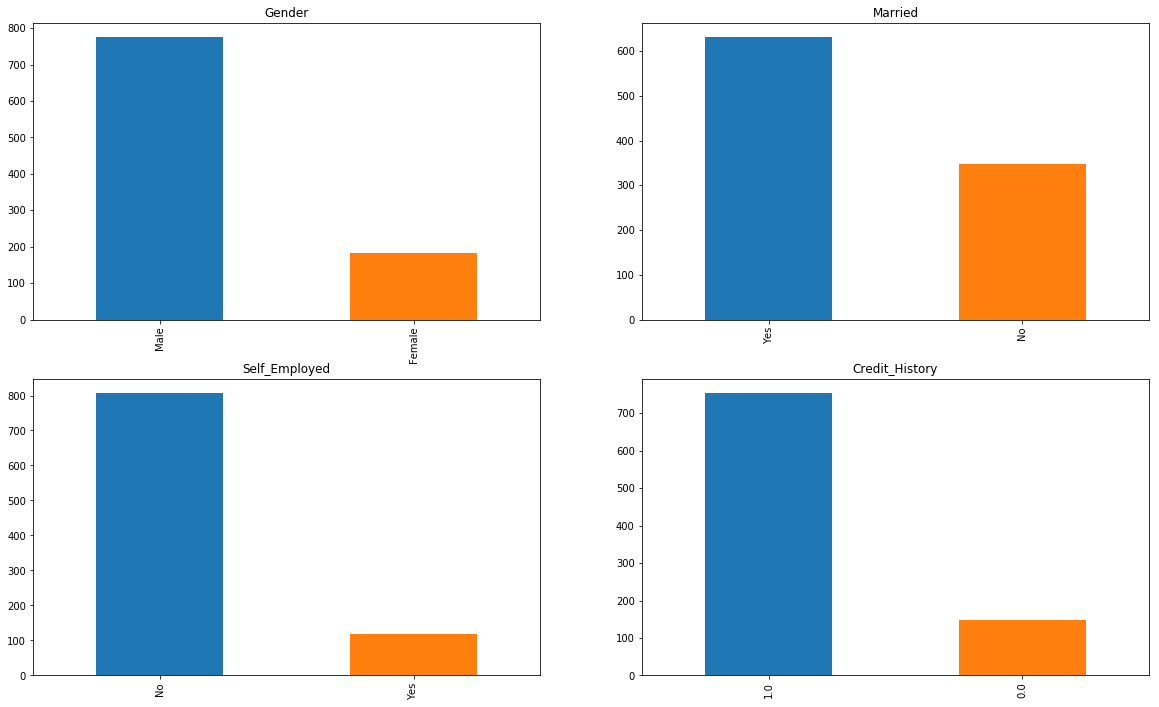

In [18]:
f,ax=plt.subplots(2,2,figsize=(20,12))
combined_df['Gender'].value_counts().plot.bar(ax = ax[0,0])
ax[0,0].set_title('Gender')
combined_df['Married'].value_counts().plot.bar(ax = ax[0,1])
ax[0,1].set_title('Married')
combined_df['Self_Employed'].value_counts().plot.bar(ax = ax[1,0])
ax[1,0].set_title('Self_Employed')
combined_df['Credit_History'].value_counts().plot.bar(ax = ax[1,1])
ax[1,1].set_title('Credit_History')

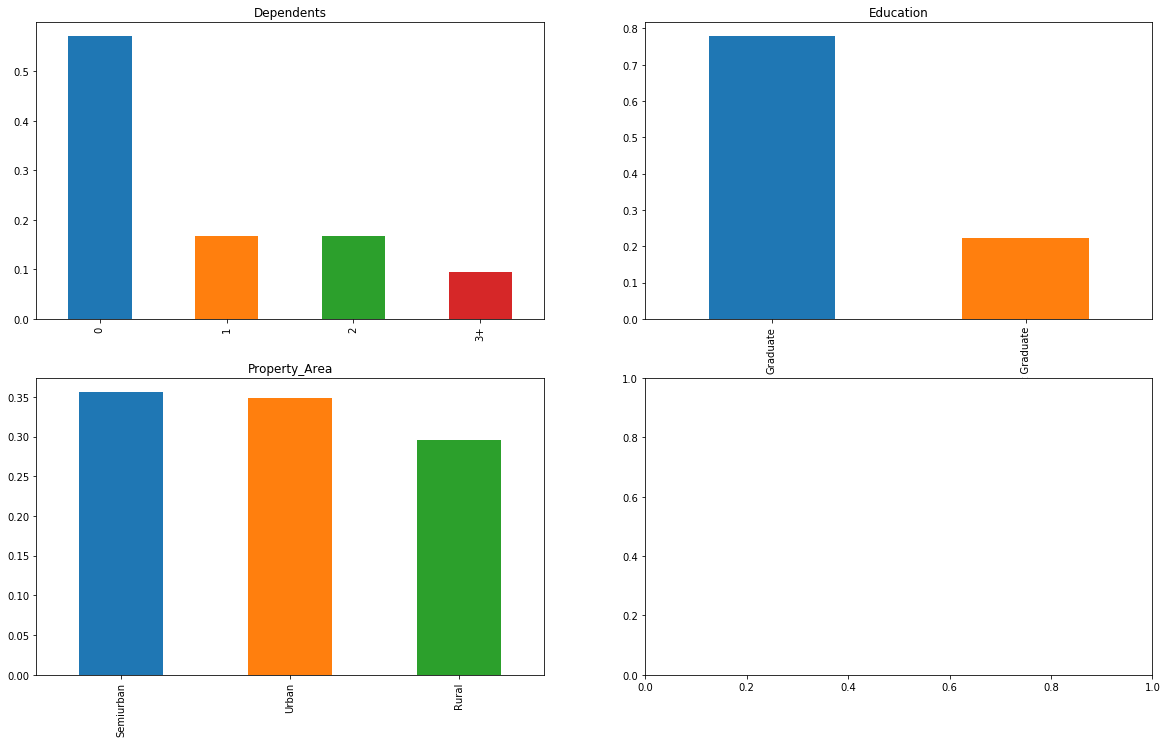

In [19]:
f,ax=plt.subplots(2,2,figsize=(20,12))
combined_df['Dependents'].value_counts(normalize = True).plot.bar(ax= ax[0,0],title = 'Dependents')
combined_df['Education'].value_counts(normalize = True).plot.bar(ax = ax[0,1],title = 'Education')
combined_df['Property_Area'].value_counts(normalize = True).plot.bar(ax = ax[1,0],title = 'Property_Area')
plt.show()

In [20]:
combined_df['Gender'].fillna('Male', inplace=True)
combined_df['Married'].fillna('Yes', inplace=True)
combined_df['Self_Employed'].fillna('Yes', inplace=True)
combined_df['Credit_History'].fillna(1, inplace=True)
combined_df['Dependents'].fillna(0,inplace = True)

### Analysis of Numeric Feature:

In [21]:
combined_df['LoanAmount'].fillna(combined_df['LoanAmount'].median(), inplace=True)
combined_df['Loan_Amount_Term'].fillna(combined_df['Loan_Amount_Term'].mean(), inplace=True)

In [22]:
combined_df.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Dependents           0
Education            0
Gender               0
LoanAmount           0
Loan_Amount_Term     0
Married              0
Property_Area        0
Self_Employed        0
dtype: int64

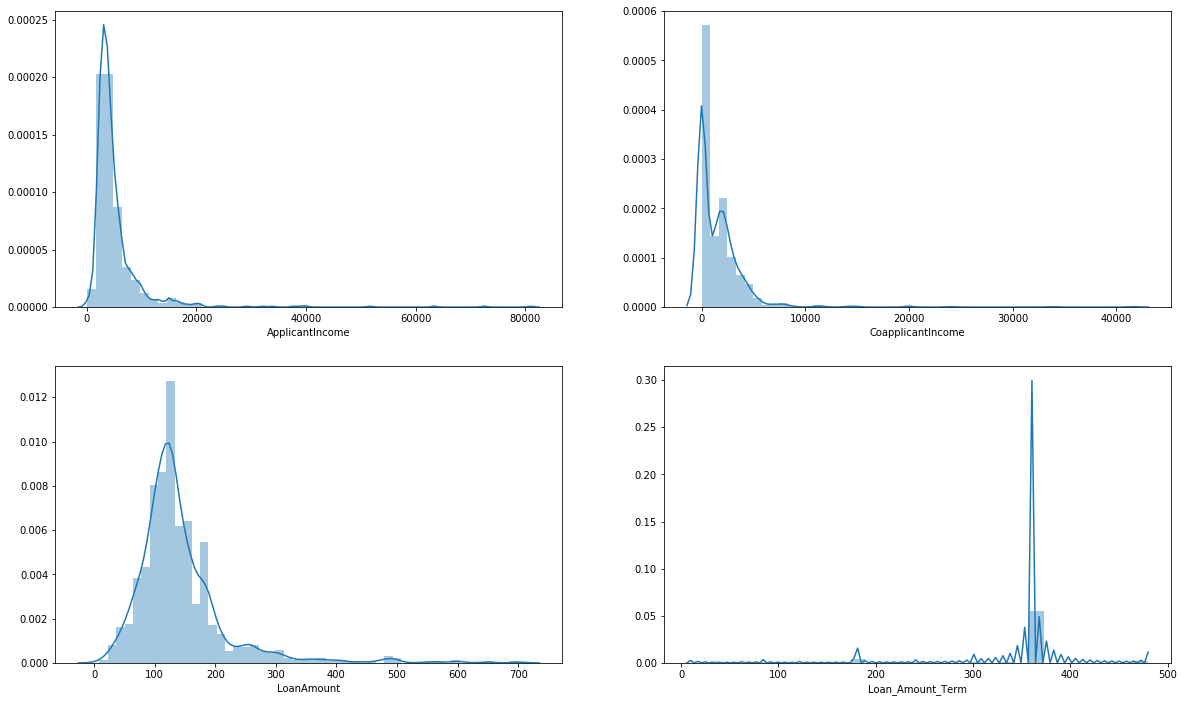

In [23]:
f,ax=plt.subplots(2,2,figsize=(20,12))
sns.distplot(combined_df['ApplicantIncome'], ax = ax[0,0])
sns.distplot(combined_df['CoapplicantIncome'], ax = ax[0,1])
sns.distplot(combined_df['LoanAmount'], ax = ax[1,0])
sns.distplot(combined_df['Loan_Amount_Term'], ax = ax[1,1])

### More Visualization on Training Dataset:

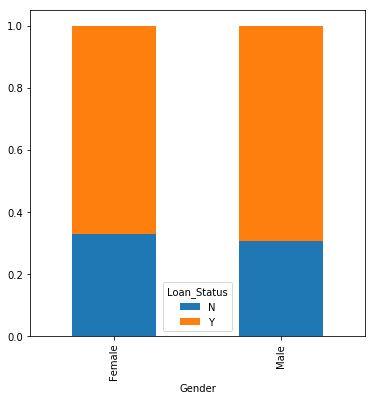

In [24]:
Gender = pd.crosstab(train_data['Gender'],train_data['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

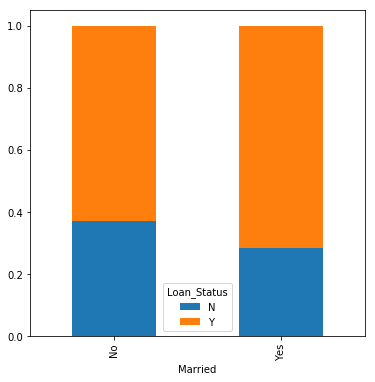

In [25]:
Married=pd.crosstab(train_data['Married'],train_data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6)) 

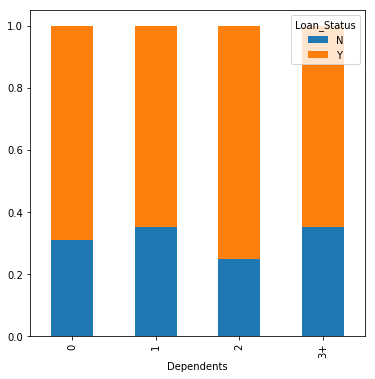

In [26]:
Dependents=pd.crosstab(train_data['Dependents'],train_data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize = (6,6))

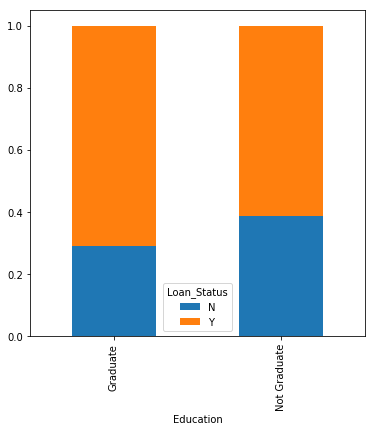

In [27]:
Education=pd.crosstab(train_data['Education'],train_data['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

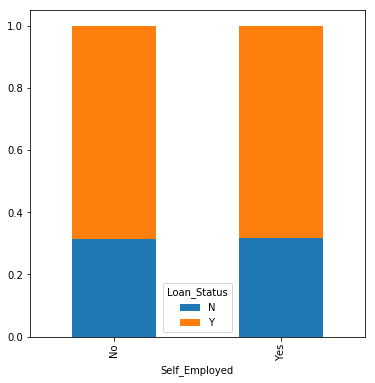

In [28]:
Self_Employed=pd.crosstab(train_data['Self_Employed'],train_data['Loan_Status'])  
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6)) 

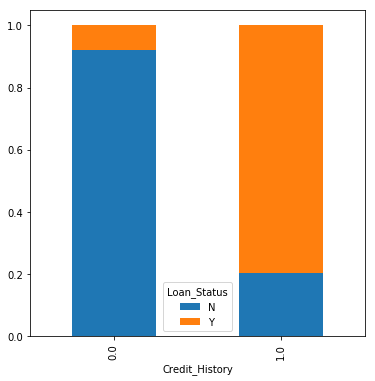

In [29]:
Credit_History=pd.crosstab(train_data['Credit_History'],train_data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

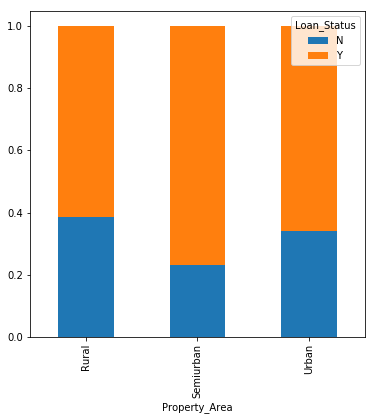

In [30]:
Property_Area=pd.crosstab(train_data['Property_Area'],train_data['Loan_Status']) 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize = (6,6))

### Feature Engineering:

In [31]:
combined_df['Gender'] = combined_df['Gender'].map({'Male':1,'Female':0})
combined_df['Married'] = combined_df['Married'].map({'Yes':1,'No':0})
combined_df['Education'] = combined_df['Education'].map({'Graduate':1,'Not Graduate':0})
combined_df['Self_Employed'] = combined_df['Self_Employed'].map({'Yes':1,'No':0})
combined_df['Singleton'] = combined_df['Dependents'].map(lambda d: 1 if d=='1' else 0)
combined_df['Small_Family'] = combined_df['Dependents'].map(lambda d: 1 if d=='2' else 0)
combined_df['Large_Family'] = combined_df['Dependents'].map(lambda d: 1 if d=='3+' else 0)
combined_df['Total_Income'] = combined_df['ApplicantIncome'] + combined_df['CoapplicantIncome']


In [32]:
combined_df.drop(['Dependents'], axis=1, inplace=True)
combined_df.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

In [33]:
combined_df['Income_Ratio'] = combined_df['Total_Income'] / combined_df['LoanAmount']

In [34]:
combined_df['Loan_Amount_Term'].value_counts()

360.000000    823
180.000000     66
480.000000     23
342.201873     20
300.000000     20
240.000000      8
84.000000       7
120.000000      4
36.000000       3
60.000000       3
12.000000       2
350.000000      1
6.000000        1
Name: Loan_Amount_Term, dtype: int64

In [35]:
combined_df['Very_Short_Term'] = combined_df['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
combined_df['Short_Term'] = combined_df['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
combined_df['Long_Term'] = combined_df['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
combined_df['Very_Long_Term'] = combined_df['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)

In [36]:
combined_df.drop('Loan_Amount_Term', axis=1, inplace=True)

In [37]:
combined_df['Credit_History_Bad'] = combined_df['Credit_History'].map(lambda c: 1 if c==0 else 0)
combined_df['Credit_History_Good'] = combined_df['Credit_History'].map(lambda c: 1 if c==1 else 0)
combined_df['Credit_History_Unknown'] = combined_df['Credit_History'].map(lambda c: 1 if c==2 else 0)

In [38]:
combined_df.drop('Credit_History', axis=1, inplace=True)

In [39]:
property_dummies = pd.get_dummies(combined_df['Property_Area'], prefix='Property')
combined_df = pd.concat([combined_df, property_dummies], axis=1)

In [40]:
combined_df.drop('Property_Area', axis=1, inplace=True)

### Feature Scaling:

In [41]:
def feature_scaling(dataframe):
    dataframe -= dataframe.min()
    dataframe /= dataframe.max()
    return dataframe


In [42]:
combined_df['LoanAmount'] = feature_scaling(combined_df['LoanAmount'])
combined_df['Total_Income'] = feature_scaling(combined_df['Total_Income'])
combined_df['Income_Ratio'] = feature_scaling(combined_df['Income_Ratio'])

In [43]:
combined_df.head()
combined_df.shape

(981, 20)

In [44]:
targets = train_data['Loan_Status']
train = combined_df.head(614)
test = combined_df.iloc[614:]


In [45]:
train['Loan_Status'] = targets

In [46]:
train.shape,test.shape

((614, 21), (367, 20))

In [47]:
X = train.drop('Loan_Status', axis = 1)
Y = targets

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 25)

### Logistic Regression : 

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logistic_model =  LogisticRegression()

In [52]:
logistic_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
pred_y = logistic_model.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test, pred_y)

0.8162162162162162

### Decision Tree :

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
pred_y=model.predict(x_test)
accuracy_score(y_test,pred_y)

0.7297297297297297

### Random Forests :

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
model=RandomForestClassifier(n_estimators= 60,max_features='sqrt')
model = model.fit(x_train,y_train)
pred_y = model.predict(x_test)
accuracy_score(pred_y,y_test)*100

82.16216216216216

In [60]:
##Feature importance:

In [61]:
features = pd.DataFrame()
features['Feature'] = X.columns
features['Importance'] = model.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

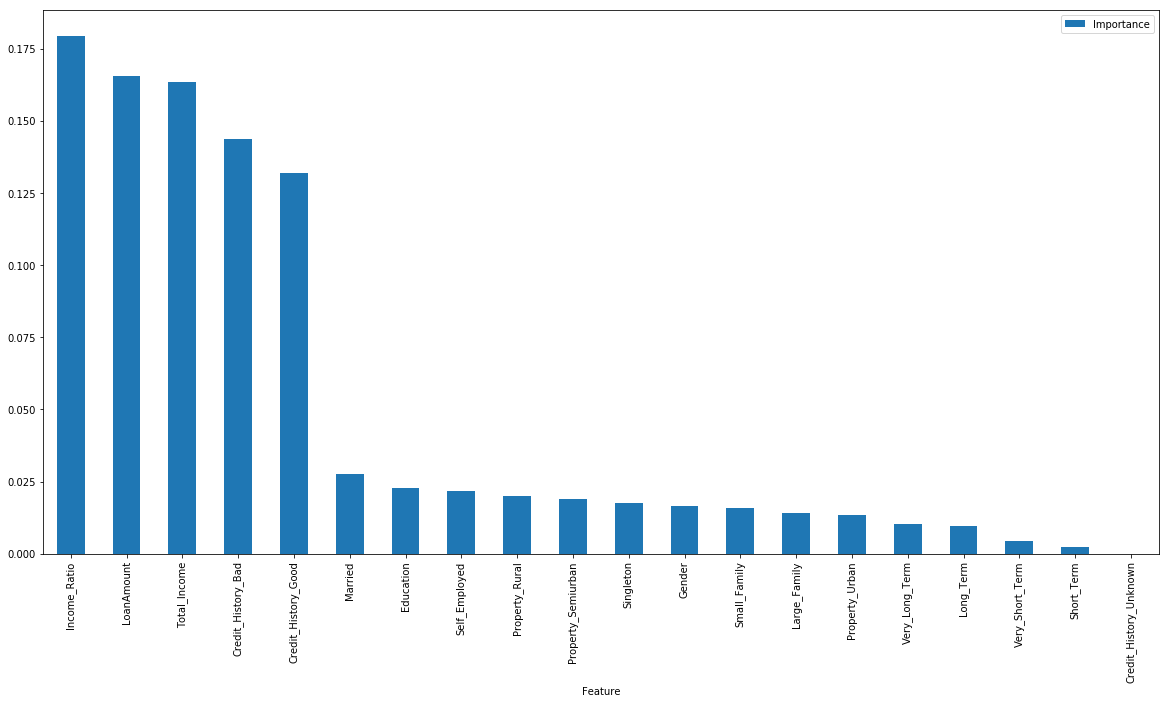

In [62]:
features.plot(kind='bar', figsize=(20, 10))

### Cross Validation :

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

In [64]:
kfold = KFold(n_splits=10, random_state=22)
means = []
accuracy = []
std = []
classifiers = ['Logistic Regression','Decision Tree','Random Forest']
models = [LogisticRegression(),DecisionTreeClassifier(),
          RandomForestClassifier(n_estimators=60)]
for model in models:
    cv_result = cross_val_score(model,X,Y,cv=kfold,scoring = 'accuracy')
    means.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

In [65]:
new_models_dataframe = pd.DataFrame({'CV Mean':means,"Std":std},index = classifiers)
new_models_dataframe

,CV Mean,Std
Logistic Regression,0.807985,0.038146
Decision Tree,0.706954,0.053033
Random Forest,0.798202,0.037019


In [66]:
predicted_loan_status = pd.Series(logistic_model.predict(test), name = "Loan_Status")

submission_df = pd.concat([test_data['Loan_ID'],predicted_loan_status], axis=1)

In [67]:
submission_df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [68]:
filename = 'Loan status Predictions 1.csv'

submission_df.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Loan status Predictions 1.csv
